In [5]:
import tensorflow as tf

We then import numpy but tell tensorflow to only log errors

In [6]:
import numpy as np
import logging

logger = tf.get_logger()
logger.setLevel(logging.ERROR)

# Setup Training Data 
As we saw before, supervised Machine Learning is all about figuring out an algorithm given a set of inputs and outputs. 
Since the task in this notebook is to create a model that can give the temperature in Fahrenheit when given the degrees in Celsius, we create two lists *celsius_q* and *fahrenheit_a* that we can use to train our model.

In [7]:
celsius_q     = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahreinheit_a = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

for i,c in enumerate(celsius_q):
    print("{} degrees Celsius = {} degrees Fahreinheit".format(c, fahreinheit_a[i]))

-40.0 degrees Celsius = -40.0 degrees Fahreinheit
-10.0 degrees Celsius = 14.0 degrees Fahreinheit
0.0 degrees Celsius = 32.0 degrees Fahreinheit
8.0 degrees Celsius = 46.0 degrees Fahreinheit
15.0 degrees Celsius = 59.0 degrees Fahreinheit
22.0 degrees Celsius = 72.0 degrees Fahreinheit
38.0 degrees Celsius = 100.0 degrees Fahreinheit


# Some Machine Learning terminology

- ## Feature
Input(s) of a model. In this case, a single value - the degrees in Celsius

- ## Labels
Output(s) of a model. In this case, a single value - the degrees in Fahnreinheit


## Create the model

Next, create the model. We will use the simplest possible model we can which is a Dense network. 
Since the problem is straightforward, this network will require only a single layer, with a single neuron.

### Build a layer

We'll call the layer `l0` and create it by instantiating `tf.keras.layers.Dense` with the following configuration:

*   `input_shape=[1]` — This specifies that the input to this layer is a single value. That is, the shape is a one-dimensional array with one member. Since this is the first (and only) layer, that input shape is the input shape of the entire model. The single value is a floating point number, representing degrees Celsius.

*   `units=1` — This specifies the number of neurons in the layer. The number of neurons defines how many internal variables the layer has to try to learn how to solve the problem (more later). Since this is the final layer, it is also the size of the model's output — a single float value representing degrees Fahrenheit. (In a multi-layered network, the size and shape of the layer would need to match the `input_shape` of the next layer.)

In [10]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

### Assemble layers into the model

Once layers are defined, they need to be assembled into a model. The Sequential model definition takes a list of layers as an argument, specifying the calculation order from the input to the output.

This model has just a single layer, l0.

In [11]:
model = tf.keras.Sequential([l0])

**Note**

You will often see the layers defined inside the model definition, rather than beforehand:

```python
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=1, input_shape=[1])
])
```

## Compile the model, with loss and optimizer functions

Before training, the model has to be compiled. When compiled for training, the model is given:

- **Loss function** — A way of measuring how far off predictions are from the desired outcome. (The measured difference is called the "loss".)

- **Optimizer function** — A way of adjusting internal values in order to reduce the loss.

In [12]:
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))

These are used during training (`model.fit()`, below) to first calculate the loss at each point, and then improve it. In fact, the act of calculating the current loss of a model and then improving it is precisely what training is.

During training, the optimizer function is used to calculate adjustments to the model's internal variables. The goal is to adjust the internal variables until the model (which is really a math function) mirrors the actual equation for converting Celsius to Fahrenheit.

TensorFlow uses numerical analysis to perform this tuning, and all this complexity is hidden from you so we will not go into the details here. What is useful to know about these parameters are:

The loss function ([mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error)) and the optimizer ([Adam](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)) used here are standard for simple models like this one, but many others are available. It is not important to know how these specific functions work at this point.

One part of the Optimizer you may need to think about when building your own models is the learning rate (`0.1` in the code above). This is the step size taken when adjusting values in the model. If the value is too small, it will take too many iterations to train the model. Too large, and accuracy goes down. Finding a good value often involves some trial and error, but the range is usually within 0.001 (default), and 0.1

## Train the model

Train the model by calling the `fit` method.

During training, the model takes in Celsius values, performs a calculation using the current internal variables (called "weights") and outputs values which are meant to be the Fahrenheit equivalent. Since the weights are initially set randomly, the output will not be close to the correct value. The difference between the actual output and the desired output is calculated using the loss function, and the optimizer function directs how the weights should be adjusted.

This cycle of calculate, compare, adjust is controlled by the `fit` method. The first argument is the inputs, the second argument is the desired outputs. The `epochs` argument specifies how many times this cycle should be run, and the `verbose` argument controls how much output the method produces.

In [13]:
history = model.fit(celsius_q, fahreinheit_a, epochs=500, verbose=False)
print("Model training is done!")

Model training is done!


## Display training statistics

The `fit` method returns a history object. We can use this object to plot how the loss of our model goes down after each training epoch. A high loss means that the Fahrenheit degrees the model predicts is far from the corresponding value in `fahrenheit_a`.

We'll use [Matplotlib](https://matplotlib.org/) to visualize this (you could use another tool). As you can see, our model improves very quickly at first, and then has a steady, slow improvement until it is very near "perfect" towards the end.

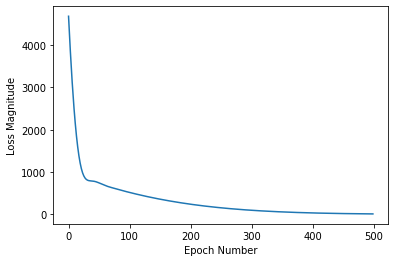

In [16]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel('Loss Magnitude')
plt.plot(history.history['loss'])

## Use the model to predict values

Now you have a model that has been trained to learn the relationship between `celsius_q` and `fahrenheit_a`. You can use the predict method to have it calculate the Fahrenheit degrees for a previously unknown Celsius degrees.

So, for example, if the Celsius value is 120, what do you think the Fahrenheit result will be? Take a guess before you run this code.

In [17]:
print(model.predict([120.0]))

[[247.80373]]
